# Data Analysis Homework 1
### Due date: Tuesday, October 15th 2024, 1 PM

In [2]:
from __future__ import division
from IPython.display import HTML
from IPython.display import display
from scipy.special import erf
from scipy.special import erfc
from math import factorial as factorial
from random import seed
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# please do NOT import any other modules than the ones imported above

## Question 1: Mean, Standard Deviation and Standard Error

12 measurements of the sensitivity of a photo diode circuit (in Amps/Watt) are: 
<br>
25.8, 26.2, 26.0, 26.5, 25.8, 26.1, 25.8, and 26.3. 
<br>
Calculate:
<br>
(i) The Mean.
<br>
(ii) The Standard Deviation.
<br>
(iii) The Standard Error.
<br>
(iv) How would you report the result?

### (i) Calculate the Mean

In [12]:
data = [25.8, 26.2, 26., 26.5, 25.8, 26.1, 25.8, 26.3]

def one_i(data):
    '''Return the mean'''
    return np.mean(data)
    
one_i(data)

26.0625

In [13]:
'''TEST CELL- DO NOT DELETE'''
# sanity checks:
assert one_i(data) <= np.max(data)
assert one_i(data) >= np.min(data)

### (ii) Calculate the sample Standard Deviation.

In [14]:
def one_ii(data):
    '''Return the standard deviation'''
    # YOUR CODE HERE
    mean = one_i(data)
    std_dev = np.sqrt(sum([(i - mean)**2 for i in data])/ (len(data) - 1))
    
    return std_dev
    
one_ii(data)

0.26152028055746845

In [15]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert one_ii(data) >= 0

### (iii) Calculate the Standard Error.

In [16]:
def one_iii(data):
    '''Return the standard error'''
    std_dev = one_ii(data)
    std_error = std_dev / np.sqrt(len(data))
    return std_error
    
one_iii(data)

0.09246138189999717

In [17]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert one_ii(data) >= 0

### (iv) How would you report the result?

The mean is 26.06 Amps/Watt. The true value should be in 26.06 ± 0.09 Amps/Watt when it has 68% confidence(1$\sigma$)

## Question 2: Error in the error

Consider a set of measurements with the standard error calculated to be $\alpha=0.987654321$.  Here we address the question of how many significant figures should be quoted.  

Required:

(i) Using pandas or any other software package, make a CSV file with four columns.  The first column should be $N$, the number of measurements on which $\alpha$ is based.  In the second column write $\alpha$ to the nine significant figures quoted above. The third and fourth columns should be ${\displaystyle \alpha\left(1-\frac{1}{\sqrt{2N-2}}\right)}$    and  ${\displaystyle \alpha\left(1+\frac{1}{\sqrt{2N-2}}\right)}$, respectively.  As we are interested in the variation over a large dynamic range, choose values for $N$ such as 2, 3, 5, 10, 20, 30, etc. 
<br>

(ii) Verify the statement from Section 2.7.1 that the number of data points,  N , needs to approach a few tens of thousands before the second significant figure in the error can be quoted, i.e. when the values in the three columns become equal to the second significant figure. Use the model that you constructed in the previous part of the question and make appropiate comments using data
<br>

(iii) Repeat the analysis for the case where α=0.123456789, i.e. the first significant digit of the error is 1. Make appropiate comments.

<br>
(iv) How many data points must be collected before the third significant figure can be quoted?

### (i) Using pandas or any other software package, make a CSV file with four columns.  The first column should be $N$, the number of measurements on which $\alpha$ is based.  In the second column write $\alpha$ to the nine significant figures quoted above. The third and fourth columns should be ${\displaystyle \alpha\left(1-\frac{1}{\sqrt{2N-2}}\right)}$    and  ${\displaystyle \alpha\left(1+\frac{1}{\sqrt{2N-2}}\right)}$, respectively.  As we are interested in the variation over a large dynamic range, choose values for $N$ such as 2, 3, 5, 10, 20, 30, etc. 

In [3]:
N_values = [2, 3, 5, 10, 20, 30]

alpha = 0.987654321

def third_columns(N, alpha):
    return alpha * (1 - (1 / np.sqrt(2 * N - 2)))

def fourth_columns(N , alpha):
    return alpha * (1 + (1 / np.sqrt(2 * N - 2)))

data = {
    "N": N_values,
    "alpha": [f"{alpha:.9f}" for _ in N_values],
    "alpha * (1 - (1 / sqrt(2N - 2)))": [third_columns(N, alpha) for N in N_values],
    "alpha * (1 + (1 / sqrt(2N - 2)))": [fourth_columns(N, alpha) for N in N_values],
}

df = pd.DataFrame(data)

df

,N,alpha,alpha * (1 - (1 / sqrt(2N - 2))),alpha * (1 + (1 / sqrt(2N - 2)))
0,2,0.987654321,0.289277,1.686031
1,3,0.987654321,0.493827,1.481481
2,5,0.987654321,0.638466,1.336843
3,10,0.987654321,0.754862,1.220447
4,20,0.987654321,0.827436,1.147873
5,30,0.987654321,0.857969,1.117340


### (ii) Verify the statement from Section 2.7.1 that the number of data points,  N , needs to approach a few tens of thousands before the second significant figure in the error can be quoted, i.e. when the values in the three columns become equal to the second significant figure. Use the model that you constructed in the previous part of the question and make appropiate comments using data

In [4]:
def find_n_signifcant(n, alpha, step_size):
    N = 2
    alpha_round = round(alpha, n)
    third = round(third_columns(N, alpha), n)
    fourth = round(fourth_columns(N, alpha), n)
    while not (third == fourth == alpha_round):
        N += step_size
        third = round(third_columns(N, alpha), n)
        fourth = round(fourth_columns(N, alpha), n)
    return N

approach_number_2 = find_n_signifcant(2, alpha, 1000)
print(f"The number of data points, N , needs to approach {approach_number_2} before the second significant figure in the error can be quoted")

alpha2 = 0.123456789
approach_number_1 = find_n_signifcant(2, alpha2, 1)
print(f"The number of data points, N , needs to approach {approach_number_1} before the second significant figure in the error can be quoted")

approach_number_3 = find_n_signifcant(3, alpha2, 1000)
print(f"The number of data points, N , needs to approach {approach_number_3} before the third significant figure in the error can be quoted")


The number of data points, N , needs to approach 70002 before the second significant figure in the error can be quoted
The number of data points, N , needs to approach 3201 before the first significant figure in the error can be quoted
The number of data points, N , needs to approach 4082002 before the third significant figure in the error can be quoted


### (iii) Repeat the analysis for the case where  α=0.123456789, i.e. the first significant digit of the error is 1. Make appropiate comments.

The number of data points, N , needs to approach 12 before the first significant figure in the error can be quoted

### (iv) How many data points must be collected before the third significant figure can be quoted?

The number of data points, N , needs to approach 20480002 before the third significant figure in the error can be quoted(test in step size = 1000)

## Question 3: Confidence limits for a Gaussian Distribution

|Centred on Mean | Measurements within range | Measurements outside range |
| --- | --- | --- |
| $\pm\sigma$ | 68% | 32% |
| $\pm1.65\sigma$ | 90% | 10% |
| $\pm2\sigma$ | 95% | 5% |
| $\pm2.58\sigma$ | 99% | 1% |
| $\pm3\sigma$ | 99.7% | 0.3% |

(i) Verify the results of the above table for the fraction of the data which lies within different ranges of a Gaussian probability distribution function. 

<br>
(ii) What fraction of the data lies outside the following ranges from the mean? 
<br>
(a) $\pm4\sigma$ 
<br>
(b) $\pm5\sigma$. 

(iii) What is the (symmetric) range within which the following fractions of the data lie, leaving your answer in terms of $\sigma$? 
<br>
 (a) 50% 
<br>
 (b) 99.9%.

### (i) Verify the results of the above table for the fraction of the data which lies within different ranges of a Gaussian probability distribution function. You must return your answers as an ARRAY OF PERCENTAGES.

In [18]:
def three_i():
    '''Return the measurements in range as an array. '''
    sigma_values = [1., 1.65, 2., 2.58, 3.]
    
    measurements_in_range = [ erf(sigma / np.sqrt(2)) * 100 for sigma in sigma_values]
    
    return(measurements_in_range)
three_i()

[68.26894921370858,
 90.10570639327038,
 95.44997361036415,
 99.01199684844588,
 99.73002039367398]

In [19]:
'''TEST CELL- DO NOT DELETE'''
# sanity check
assert type(three_i()) == list or type(three_i()) ==np.ndarray

### (ii) What fraction of the data lies outside the following ranges from the mean? You must return your answer as a PERCENTAGE.

<br>
(a) $\pm4\sigma$ 
    
<br>
(b) $\pm5\sigma$.  



In [3]:
def three_iia():
    '''Return the fraction of measurements outside the range as a PERCENTAGE'''
    return erfc(4 / np.sqrt(2)) * 100

def three_iib():
    '''Return the fraction of measurements outside the range as a PERCENTAGE'''
    return erfc(5 / np.sqrt(2)) * 100
    
print(three_iia())
print(three_iib())


0.006334248366623996
5.73303143758389e-05


In [21]:
'''TEST CELL- DO NOT DELETE'''
# sanity checks:
assert three_iia() >= 0.0
assert three_iia() <= 1.0

In [22]:
'''TEST CELL- DO NOT DELETE'''
# sanity checks:
assert three_iib() >= 0.0
assert three_iib() <= 1.0

### (iii) What is the (symmetric) range within which the following fractions of the data lie, leaving your answer in terms of $\sigma$?

<br>
(a) 50% 
<br>
(b) 99.9%.

In [23]:
def find_sigma(target):
    z = 0
    step = 0.0001
    while erf(z / np.sqrt(2)) < target:
        z += step
    return z
def three_iiia():
    '''Return the multiple of sigma'''
    target = 0.5
    sigma_multiple = find_sigma(target)
    return sigma_multiple

def three_iiib():
    '''Return the multiple of sigma'''
    target = 0.999
    sigma_multiple = find_sigma(target)
    return sigma_multiple

print(f"Multiple of sigma for 50% of the data: {three_iiia():.4f}")
print(f"Multiple of sigma for 99.9% of the data: {three_iiib():.4f}")

Multiple of sigma for 50% of the data: 0.6745
Multiple of sigma for 99.9% of the data: 3.2906


In [16]:
'''TEST CELL- DO NOT DELETE'''
# sanity checks:
assert three_iiia() >= 0.0

In [17]:
'''TEST CELL- DO NOT DELETE'''
# sanity check
assert three_iiib() >= 0.0

## Question 4: Identifying a Potential Outlier

Seven successive measurements of the charge stored on a capacitor (all in $\mu C$) are: 
<bf>
45.7, 53.2, 48.4, 45.1, 51.4, 62.1 and 49.3. 
<bf>
The sixth reading appears anomalously large. 

Required:
<br>
(i) Apply Chauvenet’s criterion to ascertain whether this data point should be rejected. In the comment, you must state 'ACCEPT' or 'REJECT'. 
<br>
(ii) Having decided whether to keep 6 or 7 data points, calculate:
<br>
<blockquote>
(a) The Mean
</blockquote>
<bf>
<blockquote>
(b) Standard Deviation
</blockquote>
<bf>
<blockquote>
(c) Error of the Charge.

### (i) Apply Chauvenet’s criterion to ascertain whether this data point should be rejected. In the comment, you must state 'ACCEPT' or 'REJECT'. 

In [26]:
data_points = [45.7, 53.2, 48.4, 45.1, 51.4, 62.1, 49.3]

def four_i():
    '''Your function must return the probability of an outlier, n_out and your comment to ACCEPT or REJECT'''
    probability_outlier = 0
    n_out = 0
    comment = ''
    
    mean = one_i(data_points)
    std_dev = one_ii(data_points)
    
    outlier = data_points[5]
    z_value = abs(outlier - mean) / std_dev
    
    probability_outlier = 1 - erf(z_value / np.sqrt(2))
    
    N = len(data_points)
    threshold = 1/ (2 * N)
    
    if probability_outlier < threshold:
        comment = 'REJECT'
    else:
        comment = 'ACCEPT'
        
    n_out = probability_outlier * N
    
    return(float(probability_outlier),float(n_out),comment)

'''TEST CELL- DO NOT DELETE'''
# sanity check
test = four_i()
assert type(test[0]) == float
assert type(test[1]) == float
assert type(test[2]) == str
### BEGIN HIDDEN TESTS
'''Tests probability_outlier'''
assert test[0]>0.046
assert test[0]<0.054
assert test[1]>0.34
assert test[1]<0.36
assert test[2] == 'REJECT'
### END HIDDEN TESTS

In [27]:
'''TEST CELL- DO NOT DELETE'''
# sanity check
test = four_i()
assert type(test[0]) == float
assert type(test[1]) == float
assert type(test[2]) == str

### (iia) Having decided whether to keep 6 or 7 datapoints, calculate the mean.

In [28]:
def four_iia():
    '''Your function should return the mean'''
    _, _, comment = four_i()
    if comment == 'REJECT':
        filtered_data_points = data_points[:5] + data_points[6:]
    else:
        filtered_data_points = data_points
        
    mean = one_i(filtered_data_points)
    
    return mean

'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert four_iia() > 0.0
### BEGIN HIDDEN TESTS
assert four_iia() >47.8
assert four_iia() < 49.4
### END HIDDEN TESTS

In [29]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert four_iia() > 0.0

### (iib) Having decided whether to keep 6 or 7 datapoints, calculate the standard deviation.

In [30]:
def four_iib():
    '''Your function should return the standard deviation'''
    _, _, comment = four_i()
    if comment == 'REJECT':
        filtered_data_points = data_points[:5] + data_points[6:]
    else:
        filtered_data_points = data_points
        
    std_dev = one_ii(filtered_data_points)
    
    return std_dev

'''TEST CELL- DO NOT DELETE'''
assert four_iib() > 0.0
### BEGIN HIDDEN TESTS
assert four_iib() > 3.1
assert four_iib() < 3.3
### END HIDDEN TESTS

In [31]:
'''TEST CELL- DO NOT DELETE'''
assert four_iib() > 0.0

### (iic) Having decided whether to keep 6 or 7 datapoints, calculate the standard error.

In [32]:
def four_iic():
    '''Your function should return the standard error'''
    _, _, comment = four_i()
    if comment == 'REJECT':
        filtered_data_points = data_points[:5] + data_points[6:]
    else:
        filtered_data_points = data_points
        
    std_error = one_iii(filtered_data_points)
    
    return std_error

'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert four_iic() > 0.0
### BEGIN HIDDEN TESTS
assert four_iic() > 1.24
assert four_iic() < 1.39
### END HIDDEN TESTS

In [33]:
'''TEST CELL- DO NOT DELETE'''
# sanity check:
assert four_iic() > 0.0

## Question 5: Poisson and Gaussian

Required:
<br>

(i) Plot a histogram of a Poisson distribution with mean 35.  
<br>

(ii) Using the same axes plot the continuous function of a Gaussian with a mean of 35, and standard deviation $\sqrt{35}$.  
<br>

(iii) Comment on the similarities and differences between the distributions.

### (i) Plot a histogram of a Poisson distribution with mean 35.  
<bf>
### (ii) Using the same axes plot the continuous function of a Gaussian with a mean of 35, and standard deviation $\sqrt{35}$. 

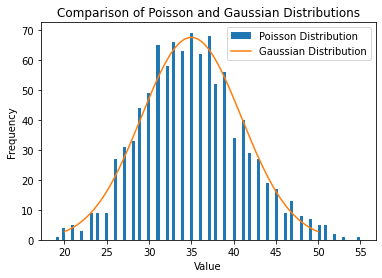

In [26]:
def five_i_and_ii():
    np.random.seed(0)
    mean_poisson = 35
    poisson_data = np.random.poisson(mean_poisson, 1000)
    
    plt.hist(poisson_data, bins=100, label='Poisson Distribution')
    
    mean_gaussian = 35
    std_gaussian = np.sqrt(35)
    x = np.linspace(20, 50, 1000)
    
    gaussian_function = (1 / (std_gaussian * np.sqrt(2 * np.pi))) * np.exp(- ((x - mean_gaussian) / std_gaussian)**2 / 2)

    plt.plot(x, gaussian_function * 1000, label='Gaussian Distribution')

    plt.title('Comparison of Poisson and Gaussian Distributions')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

five_i_and_ii()

### (iii) Comment on the similarities and differences between the distributions.

The Poisson distribution and the Gaussian distribution are very similar around the mean. As the mean of the Poisson distribution increases, it becomes closer to the Gaussian distribution.

The Poisson distribution is discrete, while the Gaussian distribution is continuous.

## Coding Exercise

Choose one of the distributions we discussed in the context of the Central Limit theorem: either the uniform distribution, the triangular distribution or a Gaussian distribution. They should span the interval 0 to 1.
<bf>
Write code that allows you to choose numbers at random from this distribution. Then,

<blockquote>
<bf>
(i) Choose 1,000 numbers at random, and plot a histogram of their occurrences.
</blockquote>
<bf>
<blockquote>
(ii) Choose 2 numbers from  the distribution at random, and average them.  Repeat this 1,000 times and plot a histogram.
<bf>
</blockquote>
<blockquote>
(iii) Do the same for the sum of 3, 4 and 5 numbers, and make the corresponding plots.
<bf>
</blockquote>
<blockquote>
(iv) Comment on your results.

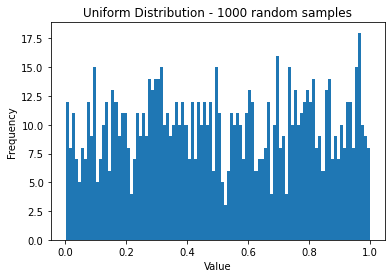

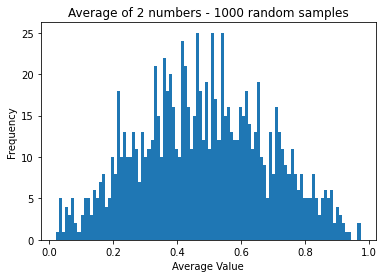

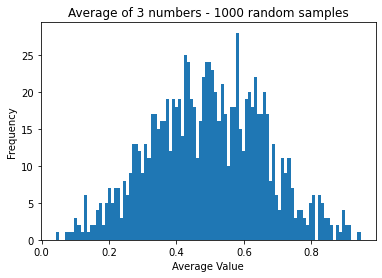

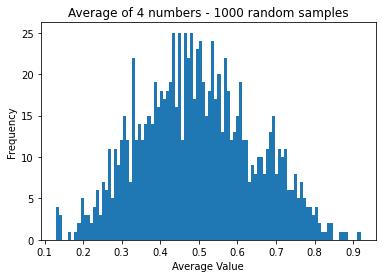

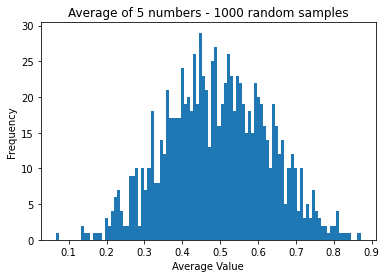

In [27]:
def coding_exercise_i():
    data = np.random.uniform(0, 1, 1000)
    plt.hist(data, bins=100)
    plt.title('Uniform Distribution - 1000 random samples')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
def coding_exercise_ii():
    avg_data = [(np.random.uniform(0, 1) + np.random.uniform(0, 1)) / 2 for _ in range(1000)]
    plt.hist(avg_data, bins=100)
    plt.title('Average of 2 numbers - 1000 random samples')
    plt.xlabel('Average Value')
    plt.ylabel('Frequency')
    plt.show()
    
def coding_exercise_iii(n):
    avg_data = [np.mean(np.random.uniform(0, 1, n)) for _ in range(1000)]
    plt.hist(avg_data, bins=100)
    plt.title(f'Average of {n} numbers - 1000 random samples')
    plt.xlabel('Average Value')
    plt.ylabel('Frequency')
    plt.show()
    
coding_exercise_i()
coding_exercise_ii()
coding_exercise_iii(3)
coding_exercise_iii(4)
coding_exercise_iii(5)

### (iv) Comment on your results.

The histogram of uniformly distributed random numbers shows a relatively flat distribution.

The distribution of the average of two numbers is more concentrated around 0.5 than the original uniformly distributed random numbers.

The distribution of the average of multiple numbers (3, 4, 5 numbers) are closer to a normal distribution.